# Homework 1: Data basics 

Due: 1/12/2016

##Problem:

- Obtain the CSV (comma separated variable) file containing the counts of bicycles crossing the Fremont Bridge since 2012 (as described here).
- Create a project directory with subdirectories for data and analysis, and create a README file.
- Download the data from here. Put the it into the data directory.
- Create an iPython Notebook to analyze these data. 

In the notebook: 

 1. Isolate the 2015 data, creating fields for date, hour, and count; 
 2. use python matplotlib to plot the counts by hour; 
 3. compute the hourly average counts;
 4. determine what is the busiest hour of the day.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
matplotlib.rcParams['figure.figsize'] = (15, 8)

import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("../data/4xy5-26gy.csv", parse_dates=['date'], index_col=['date'])

In [3]:
data.head()

,fremont_bridge_nb,fremont_bridge_sb
date,,
2012-10-03 02:00:00,1,1
2012-10-05 01:00:00,4,4
2012-10-05 03:00:00,2,2
2012-10-05 23:00:00,16,16
2012-10-07 22:00:00,9,9


##1. Isolate the 2015 data, creating fields for date, hour, and count;

In [4]:
data['datetime'] = data.index.copy()

In [5]:
data.head()

,fremont_bridge_nb,fremont_bridge_sb,datetime
date,,,
2012-10-03 02:00:00,1,1,2012-10-03 02:00:00
2012-10-05 01:00:00,4,4,2012-10-05 01:00:00
2012-10-05 03:00:00,2,2,2012-10-05 03:00:00
2012-10-05 23:00:00,16,16,2012-10-05 23:00:00
2012-10-07 22:00:00,9,9,2012-10-07 22:00:00


In [6]:
data['year'] = data['datetime'].apply(lambda x: x.year)

In [7]:
data.head()

,fremont_bridge_nb,fremont_bridge_sb,datetime,year
date,,,,
2012-10-03 02:00:00,1,1,2012-10-03 02:00:00,2012
2012-10-05 01:00:00,4,4,2012-10-05 01:00:00,2012
2012-10-05 03:00:00,2,2,2012-10-05 03:00:00,2012
2012-10-05 23:00:00,16,16,2012-10-05 23:00:00,2012
2012-10-07 22:00:00,9,9,2012-10-07 22:00:00,2012


In [8]:
data = data[data['year'] == 2015]

In [9]:
data = data.drop('year',1)

In [10]:
data['date'] = data['datetime'].apply(lambda x: x.date())

In [11]:
data.head()

,fremont_bridge_nb,fremont_bridge_sb,datetime,date
date,,,,
2015-07-30 05:00:00,20,22,2015-07-30 05:00:00,2015-07-30
2015-07-11 20:00:00,29,36,2015-07-11 20:00:00,2015-07-11
2015-07-31 19:00:00,88,103,2015-07-31 19:00:00,2015-07-31
2015-07-14 08:00:00,448,190,2015-07-14 08:00:00,2015-07-14
2015-07-17 20:00:00,32,66,2015-07-17 20:00:00,2015-07-17


In [12]:
data['hour'] = data['datetime'].apply(lambda x: x.time().hour)

In [13]:
data.head()

,fremont_bridge_nb,fremont_bridge_sb,datetime,date,hour
date,,,,,
2015-07-30 05:00:00,20,22,2015-07-30 05:00:00,2015-07-30,5
2015-07-11 20:00:00,29,36,2015-07-11 20:00:00,2015-07-11,20
2015-07-31 19:00:00,88,103,2015-07-31 19:00:00,2015-07-31,19
2015-07-14 08:00:00,448,190,2015-07-14 08:00:00,2015-07-14,8
2015-07-17 20:00:00,32,66,2015-07-17 20:00:00,2015-07-17,20


In [14]:
date_hour_data = data.groupby(['date','hour']).sum()

In [15]:
date_hour_data.head()

fremont_bridge_nb  fremont_bridge_sb
date       hour                                      
2015-07-01 0                     7                  7
           1                     5                  4
           2                     2                  7
           3                     4                  7
           4                     9                  4

##2. use python matplotlib to plot the counts by hour

In [16]:
hour_data = data.groupby('hour').sum()

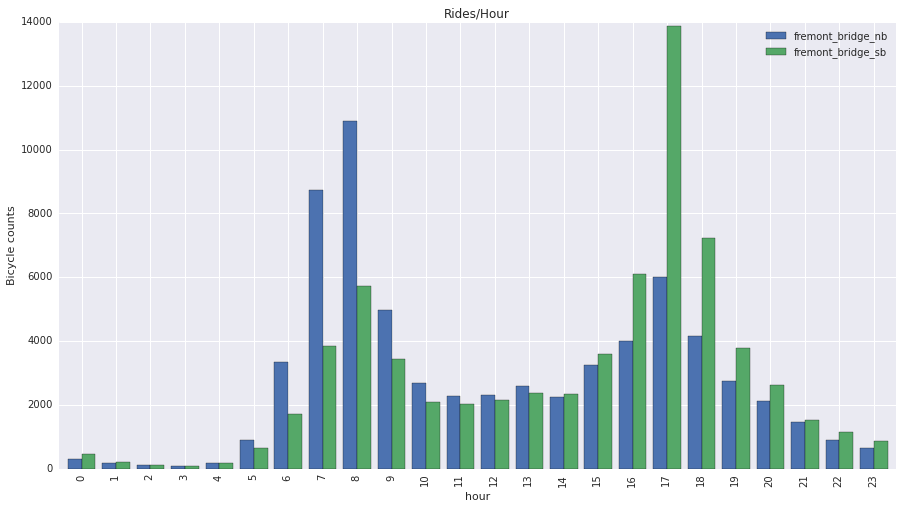

In [17]:
ax = hour_data.plot(kind='bar',title='Rides/Hour', width=0.8)
ax.set_ylabel("Bicycle counts")

 ##3. compute the hourly average counts


In [18]:
hour_mean = data.groupby('hour').mean()

In [19]:
hour_mean

,fremont_bridge_nb,fremont_bridge_sb
hour,,
0,8.297297,12.351351
1,4.685714,5.828571
2,3.161290,3.677419
3,2.531250,2.468750
4,5.111111,4.694444
5,20.744186,14.790698
6,86.076923,44.102564
7,224.282051,98.461538
8,279.205128,146.589744


##4. Determine what is the busiest hour of the day

In [20]:
hour_mean.sort('fremont_bridge_nb', ascending=False).head(5)

,fremont_bridge_nb,fremont_bridge_sb
hour,,
8,279.205128,146.589744
7,224.282051,98.461538
17,154.384615,355.717949
9,134.432432,92.513514
18,122.500000,212.323529


In [21]:
hour_mean.sort('fremont_bridge_sb', ascending=False).head(5)

,fremont_bridge_nb,fremont_bridge_sb
hour,,
17,154.384615,355.717949
18,122.500000,212.323529
16,114.057143,174.771429
8,279.205128,146.589744
19,78.828571,108.114286
